# Gradient boosting classification

We use a classification model to predict which customers will default on their credit card debt. 

## Data

The credit data is a simulated data set containing information on ten thousand customers (taken from [James et al. (2021)](https://www.statlearning.com/)). The aim here is to use a classification model to predict which customers will default on their credit card debt (i.e., failure to repay a debt):

- default: A categorical variable with levels No and Yes indicating whether the customer defaulted on their debt 
- student: A categorical variable with levels No and Yes indicating whether the customer is a student
- balance: The average balance that the customer has remaining on their credit card after making their monthly payment
- income: Income of customer

## Import data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/Default.csv')

## Inspect data

In [2]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
# check for missing values
print(df.isnull().sum())

default    0
student    0
balance    0
income     0
dtype: int64


##  Data preparation

### Categorical data

First, we convert categorical data into indicator variables: 

In [5]:
dummies = pd.get_dummies(df[['default', 'student']], drop_first=True, dtype=float)
dummies.head(3)

,default_Yes,student_Yes
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0


In [6]:
# combine data and drop original categorical variables
df = pd.concat([df, dummies], axis=1).drop(columns = ['default', 'student'])
df.head(3)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0


### Label and features 

Next, we create our y label and features:

In [7]:
y = df['default_Yes']
X = df.drop(columns = 'default_Yes')

### Train test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Data exploration

Create data for exploratory data analysis.

In [9]:
train_dataset = pd.DataFrame(X_train.copy())
train_dataset['default_Yes'] = pd.DataFrame(y_train)

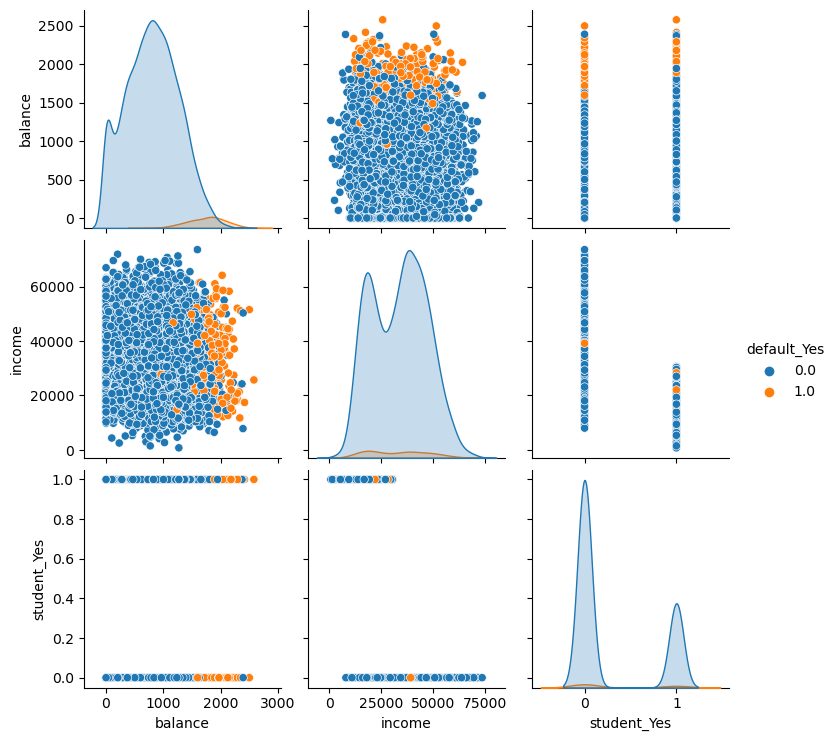

In [10]:
import seaborn as sns

sns.pairplot(train_dataset, hue='default_Yes');

## Model

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, 
                                learning_rate=1.0,
                                max_depth=1, 
                                random_state=0).fit(X_train, y_train)

                                
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [12]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.9696666666666667

### Confusion matrix

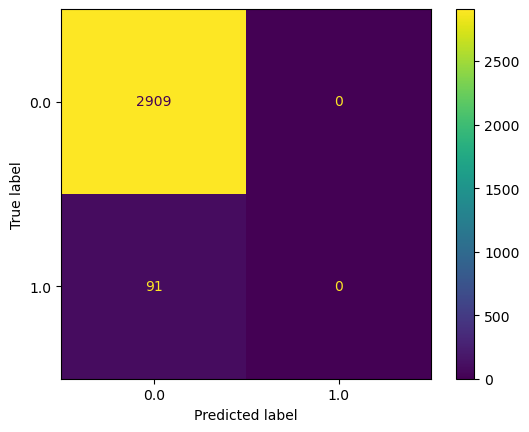

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Classification report

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      2909
         Yes       0.00      0.00      0.00        91

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000



### Change threshold

Use specific threshold

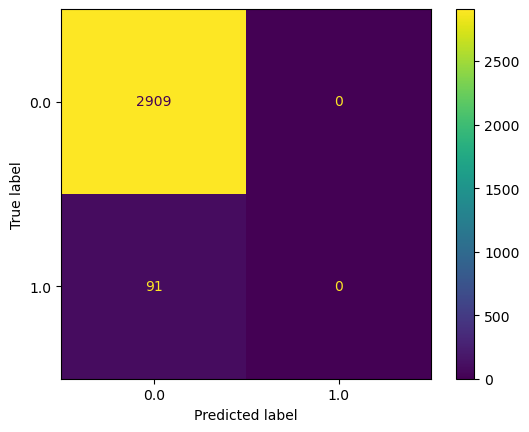

In [15]:
pred_proba = clf.predict_proba(X_test)

df_ = pd.DataFrame({'y_test': y_test, 'y_pred': pred_proba[:,1] > .25})
cm = confusion_matrix(y_test, df_['y_pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


### Classification report

In [18]:

print(classification_report(y_test, df_['y_pred'], zero_division=0))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2909
         1.0       0.00      0.00      0.00        91

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000

